# Introduction and Goal

This project focuses on predicting whether aerogel bonding processes are successful using the dataset aerogel_bonding.csv. The goal is to assist Advanced Material Corporate Ltd in evaluating bonding quality for commercial use.

**Importing the packages needed for EDA** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msnoi

# Loading and Inspecting the Dataset: 

In [ ]:
aerogel_bonding_df = pd.read_csv('aerogel_bonding.csv') 

In [3]:
aerogel_bonding_df.head() # Prints the first 5 rows to observe the dataset

,HolidaysTaken,PercentageOfCompletedTasks,CurrentJobDuration,RecentHolidaysTaken,RequestedProcessAmount,JobStatus,BondingRiskRating,TotalMaterialProcessed,ByproductRation,working_skills,...,TotalMaterialToProcess,WorkHistoryDuration,ApplicantAge,PriorExecutionDefaults,DifferentTasksCompleted,TotalChurnRisk,OtherCompaniesMaterialProcessed,BondingPeriod,trustability,MonthlyExecutions
0,4.0,NaN,6.0,1.0,51172.0,Employed,46.0,300388.0,0.273137,1.244120,...,14193.0,3.0,67.0,0.0,NaN,NaN,NaN,24.0,3.144274,440.0
1,1.0,0.323046,4.0,0.0,11246.0,Employed,54.0,299914.0,0.450387,2.228183,...,85355.0,28.0,52.0,NaN,0.0,0.232582,214559.0,36.0,3.704809,NaN
2,5.0,0.491574,3.0,1.0,14075.0,Employed,42.4,74687.0,0.325027,2.699264,...,14006.0,NaN,45.0,0.0,0.0,0.240812,60681.0,60.0,2.427195,171.0
3,4.0,0.108916,3.0,1.0,18957.0,Employed,40.8,47866.0,NaN,0.445854,...,13240.0,16.0,42.0,0.0,4.0,0.231520,34626.0,84.0,1.156431,212.0
4,NaN,0.174628,1.0,2.0,17902.0,Employed,51.0,18181.0,0.388317,1.940075,...,44217.0,28.0,50.0,0.0,0.0,0.214425,4812.0,48.0,3.185402,323.0


In [4]:
print("Rows:",aerogel_bonding_df.shape[0]) # Number of rows

Rows: 20000


In [5]:
print(aerogel_bonding_df.dtypes) # Identifies the datatypes of each column 

HolidaysTaken                      float64
PercentageOfCompletedTasks         float64
CurrentJobDuration                 float64
RecentHolidaysTaken                float64
RequestedProcessAmount             float64
JobStatus                           object
BondingRiskRating                  float64
TotalMaterialProcessed             float64
ByproductRation                    float64
working_skills                     float64
CivilStatus                         object
dependability                      float64
MistakesLastYear                   float64
HighestEducationAttained            object
BondingSuccessful                  float64
ChurnRisk                          float64
ProcessedKilograms                 float64
SkillRating                        float64
ProcessingTimestamp                 object
WorkExperience                     float64
HistoricalBehavior                 float64
TotalMaterialToProcess             float64
WorkHistoryDuration                float64
ApplicantAg

# Checking data integrity

In [6]:
# Counts NaN (not a number/missing) values in the dataset
nan_count = aerogel_bonding_df.isna().sum() #counts the NaN values(1); false (0) otherwise

# Displays the count of NaN values for each column
print("NaN count in each column:")
print(nan_count)

NaN count in each column:
HolidaysTaken                      1905
PercentageOfCompletedTasks         2045
CurrentJobDuration                 2048
RecentHolidaysTaken                1969
RequestedProcessAmount             2075
JobStatus                          2018
BondingRiskRating                  2050
TotalMaterialProcessed             2043
ByproductRation                    1972
working_skills                     1966
CivilStatus                        1954
dependability                      1949
MistakesLastYear                   1987
HighestEducationAttained           2063
BondingSuccessful                  2003
ChurnRisk                          2072
ProcessedKilograms                 1954
SkillRating                        1967
ProcessingTimestamp                2023
WorkExperience                     1931
HistoricalBehavior                 2009
TotalMaterialToProcess             1955
WorkHistoryDuration                2002
ApplicantAge                       2068
PriorExecution

<Axes: >

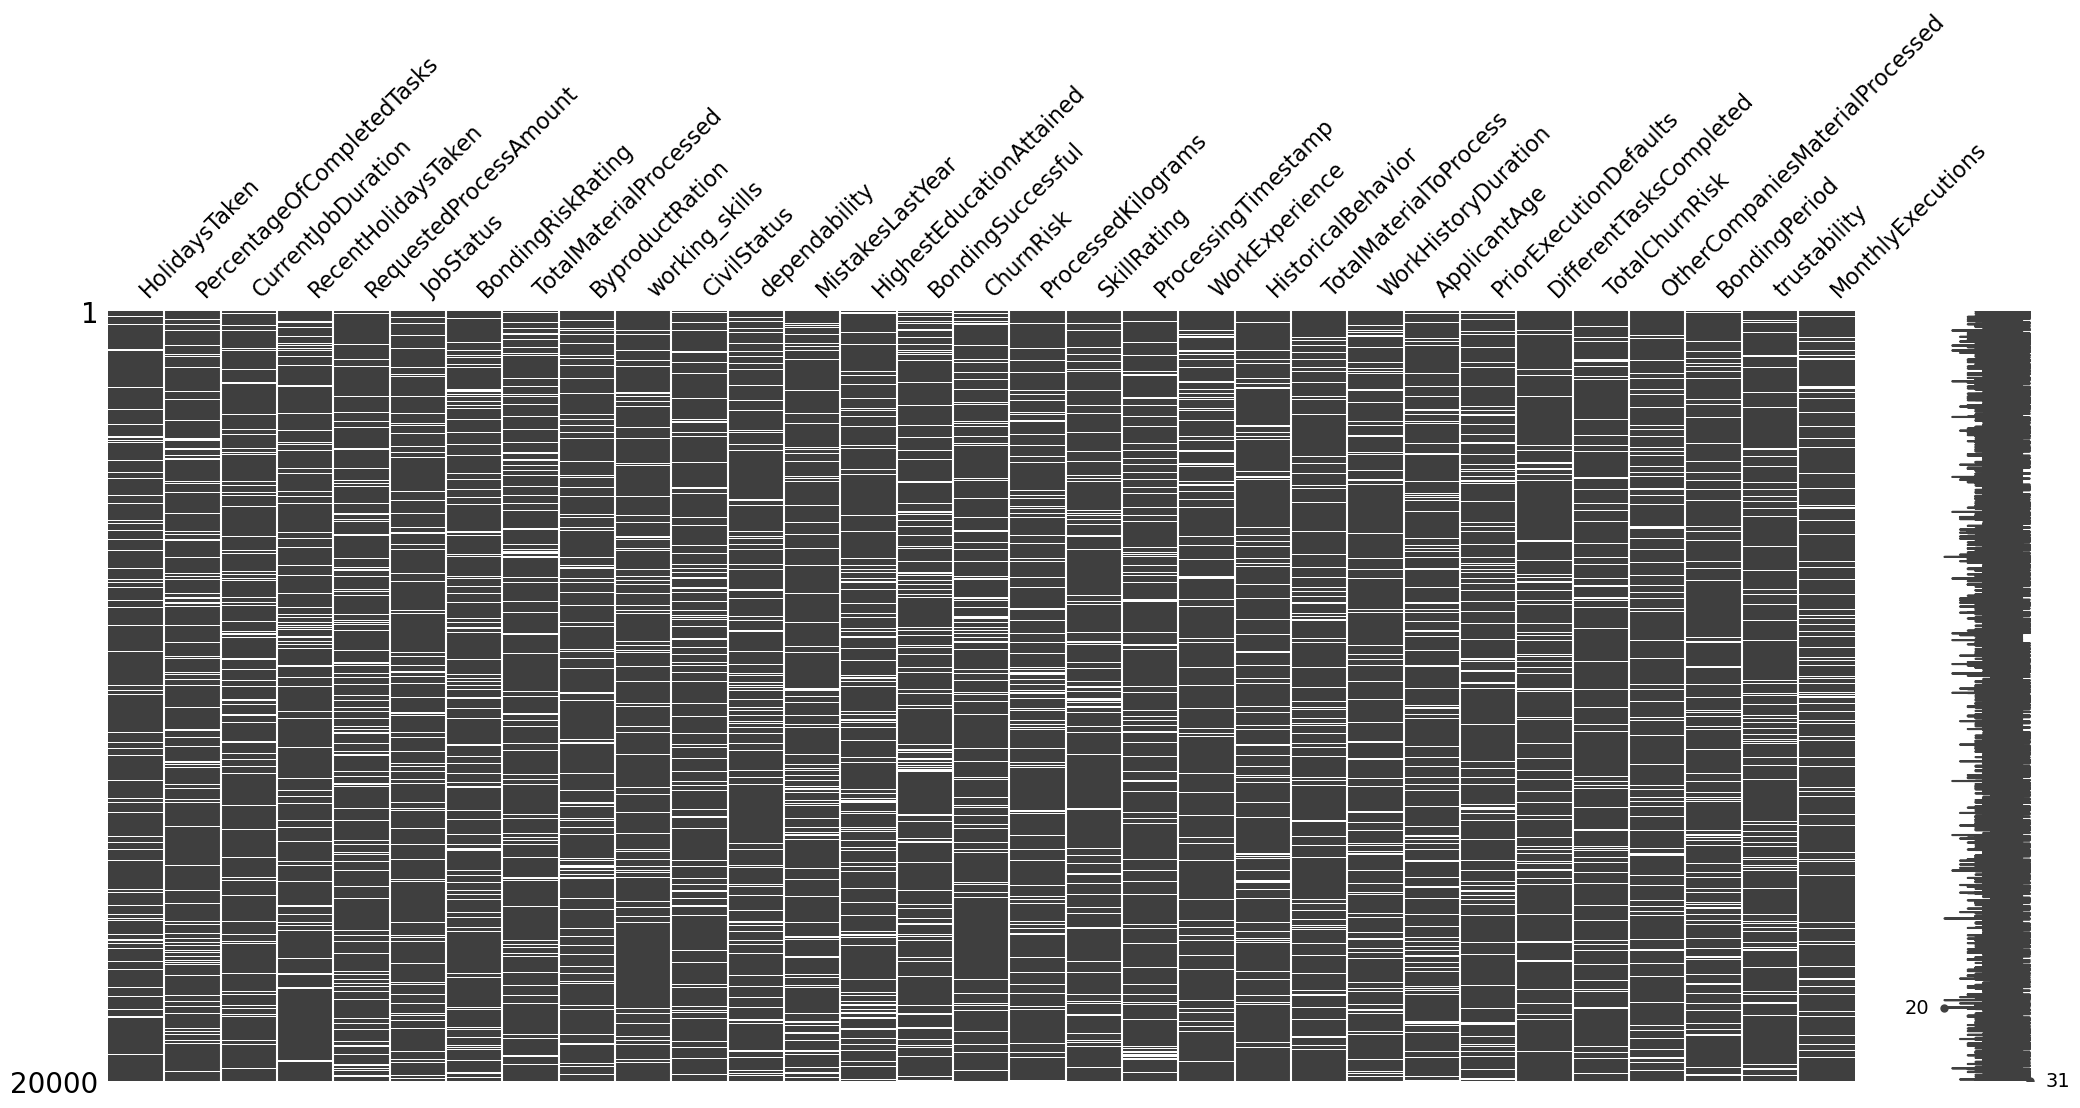

In [7]:
msnoi.matrix(aerogel_bonding_df)

We can see here that the proportion of missing values for each column is approximately the same. 
The missingness pattern suggests that values may be missing completely at random (MCAR), given their uniform distribution across rows and columns. 

In [8]:
missing_rows = aerogel_bonding_df.isna().sum(axis=1)
print(missing_rows.value_counts())

#Counts the frequency of each unique number of missing columns
#For example, 4735 rows has 3 missing values

3     4735
2     4357
4     3672
1     2584
5     2235
6     1021
0      790
7      399
8      143
9       43
10      17
11       4
Name: count, dtype: int64


Distribution of Missing Values per row plotted:

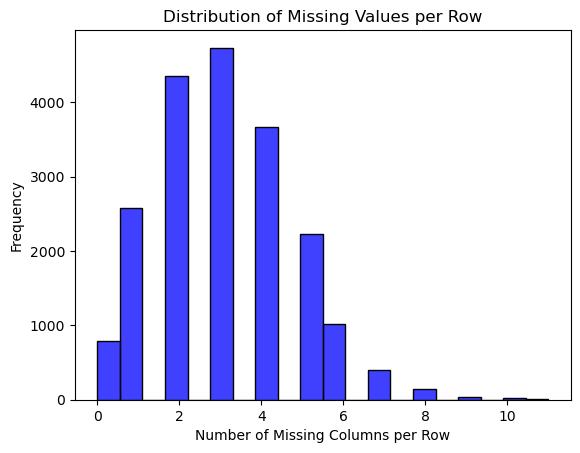

In [9]:
missing_rows_count = aerogel_bonding_df.isna().sum(axis=1)
sns.histplot(missing_rows_count, kde=False, bins=20, color='blue')
plt.title('Distribution of Missing Values per Row')
plt.xlabel('Number of Missing Columns per Row')
plt.ylabel('Frequency')
plt.show()

Implementing a function to construct missing values table

In [10]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Makes a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Renames the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sorts the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Prints some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Returns the dataframe with missing information
        return mis_val_table_ren_columns


missing_values_table(aerogel_bonding_df) # to see the number of missing values in each column

Your selected dataframe has 31 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values
RequestedProcessAmount,2075,10.4
ChurnRisk,2072,10.4
ApplicantAge,2068,10.3
HighestEducationAttained,2063,10.3
PriorExecutionDefaults,2055,10.3
BondingRiskRating,2050,10.2
CurrentJobDuration,2048,10.2
PercentageOfCompletedTasks,2045,10.2
BondingPeriod,2044,10.2
TotalMaterialProcessed,2043,10.2


# Handling missing data:

We used different approaches to handle missing data for numeric, non-numeric and binary valued columns:

First, we identified the non-numeric columns: 

In [11]:
# Filters the DataFrame to include only non-numeric columns and outputs list of non-numeric column names 
non_numeric_columns = aerogel_bonding_df.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric cloumns:",non_numeric_columns)

Non-numeric cloumns: ['JobStatus', 'CivilStatus', 'HighestEducationAttained', 'ProcessingTimestamp']


Handles missing values in non-numeric columns

In [12]:
# Fills missing values in non-numeric columns with the mode
non_numeric_columns = aerogel_bonding_df.select_dtypes(exclude=['number']).columns
for column in non_numeric_columns:
    aerogel_bonding_df[column] = aerogel_bonding_df[column].fillna(aerogel_bonding_df[column].mode()[0])

# Shows the updated DataFrame NaN value table
nan_count_after = aerogel_bonding_df.isna().sum() #counts the NaN values(1); false (0) otherwise

# Displays the count of NaN values for each column
print("NaN count in each column:")
print(nan_count_after)

NaN count in each column:
HolidaysTaken                      1905
PercentageOfCompletedTasks         2045
CurrentJobDuration                 2048
RecentHolidaysTaken                1969
RequestedProcessAmount             2075
JobStatus                             0
BondingRiskRating                  2050
TotalMaterialProcessed             2043
ByproductRation                    1972
working_skills                     1966
CivilStatus                           0
dependability                      1949
MistakesLastYear                   1987
HighestEducationAttained              0
BondingSuccessful                  2003
ChurnRisk                          2072
ProcessedKilograms                 1954
SkillRating                        1967
ProcessingTimestamp                   0
WorkExperience                     1931
HistoricalBehavior                 2009
TotalMaterialToProcess             1955
WorkHistoryDuration                2002
ApplicantAge                       2068
PriorExecution

Identifying binary cloumns:

In [13]:
# Filters the DataFrame to include only binary columns(i.e., columns that contain only 0.0 and 1.0) and outputs list of binary column names
binary_columns = []

for column in aerogel_bonding_df.select_dtypes(include=['number']).columns:
    if column == 'BondingSuccessful':
        continue
    if set(aerogel_bonding_df[column].dropna().unique()) == {0.0, 1.0} or set(aerogel_bonding_df[column].dropna().unique()) == {0, 1}:
        binary_columns.append(column)
        
print("Binary cloumns:",binary_columns)

Binary cloumns: ['MistakesLastYear', 'PriorExecutionDefaults']


Handles missing values in binary columns

In [14]:
# Drops the rows with missing target
aerogel_bonding_df = aerogel_bonding_df.dropna(subset=['BondingSuccessful'])

for column in binary_columns:
    mode_value = aerogel_bonding_df[column].mode()[0]
    aerogel_bonding_df[column] = aerogel_bonding_df[column].fillna(mode_value)

# Shows the updated DataFrame NaN value table
nan_count_after = aerogel_bonding_df.isna().sum() #counts the NaN values(1); false (0) otherwise

# Displays the count of NaN values for each column
print("NaN count in each column:")
print(nan_count_after)

NaN count in each column:
HolidaysTaken                      1702
PercentageOfCompletedTasks         1847
CurrentJobDuration                 1845
RecentHolidaysTaken                1762
RequestedProcessAmount             1862
JobStatus                             0
BondingRiskRating                  1828
TotalMaterialProcessed             1818
ByproductRation                    1807
working_skills                     1769
CivilStatus                           0
dependability                      1763
MistakesLastYear                      0
HighestEducationAttained              0
BondingSuccessful                     0
ChurnRisk                          1871
ProcessedKilograms                 1746
SkillRating                        1794
ProcessingTimestamp                   0
WorkExperience                     1735
HistoricalBehavior                 1827
TotalMaterialToProcess             1747
WorkHistoryDuration                1794
ApplicantAge                       1879
PriorExecution

Identifying numeric cloumns:

In [15]:
# Filters the DataFrame to include only numeric columns and outputs list of numeric column names 
numeric_columns = aerogel_bonding_df.select_dtypes(include=['number']).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in binary_columns]
print("Numeric columns:",numeric_columns)

Numeric columns: ['HolidaysTaken', 'PercentageOfCompletedTasks', 'CurrentJobDuration', 'RecentHolidaysTaken', 'RequestedProcessAmount', 'BondingRiskRating', 'TotalMaterialProcessed', 'ByproductRation', 'working_skills', 'dependability', 'BondingSuccessful', 'ChurnRisk', 'ProcessedKilograms', 'SkillRating', 'WorkExperience', 'HistoricalBehavior', 'TotalMaterialToProcess', 'WorkHistoryDuration', 'ApplicantAge', 'DifferentTasksCompleted', 'TotalChurnRisk', 'OtherCompaniesMaterialProcessed', 'BondingPeriod', 'trustability', 'MonthlyExecutions']


Handles missing values in numeric columns

In [16]:
# Fills missing values in numeric columns with the mean
aerogel_bonding_df[numeric_columns] = aerogel_bonding_df[numeric_columns].fillna(aerogel_bonding_df[numeric_columns].mean())

# Shows the updated DataFrame NaN value table
nan_count_after = aerogel_bonding_df.isna().sum() #counts the NaN values(1); false (0) otherwise

# Displays the count of NaN values for each column
print("NaN count in each column:")
print(nan_count_after)

NaN count in each column:
HolidaysTaken                      0
PercentageOfCompletedTasks         0
CurrentJobDuration                 0
RecentHolidaysTaken                0
RequestedProcessAmount             0
JobStatus                          0
BondingRiskRating                  0
TotalMaterialProcessed             0
ByproductRation                    0
working_skills                     0
CivilStatus                        0
dependability                      0
MistakesLastYear                   0
HighestEducationAttained           0
BondingSuccessful                  0
ChurnRisk                          0
ProcessedKilograms                 0
SkillRating                        0
ProcessingTimestamp                0
WorkExperience                     0
HistoricalBehavior                 0
TotalMaterialToProcess             0
WorkHistoryDuration                0
ApplicantAge                       0
PriorExecutionDefaults             0
DifferentTasksCompleted            0
TotalChurnRi

# Correlation to select the features: 

**Heatmap and Pairplot plotting to see the correlation between the variables, and choose the right variables to include in train/test data**

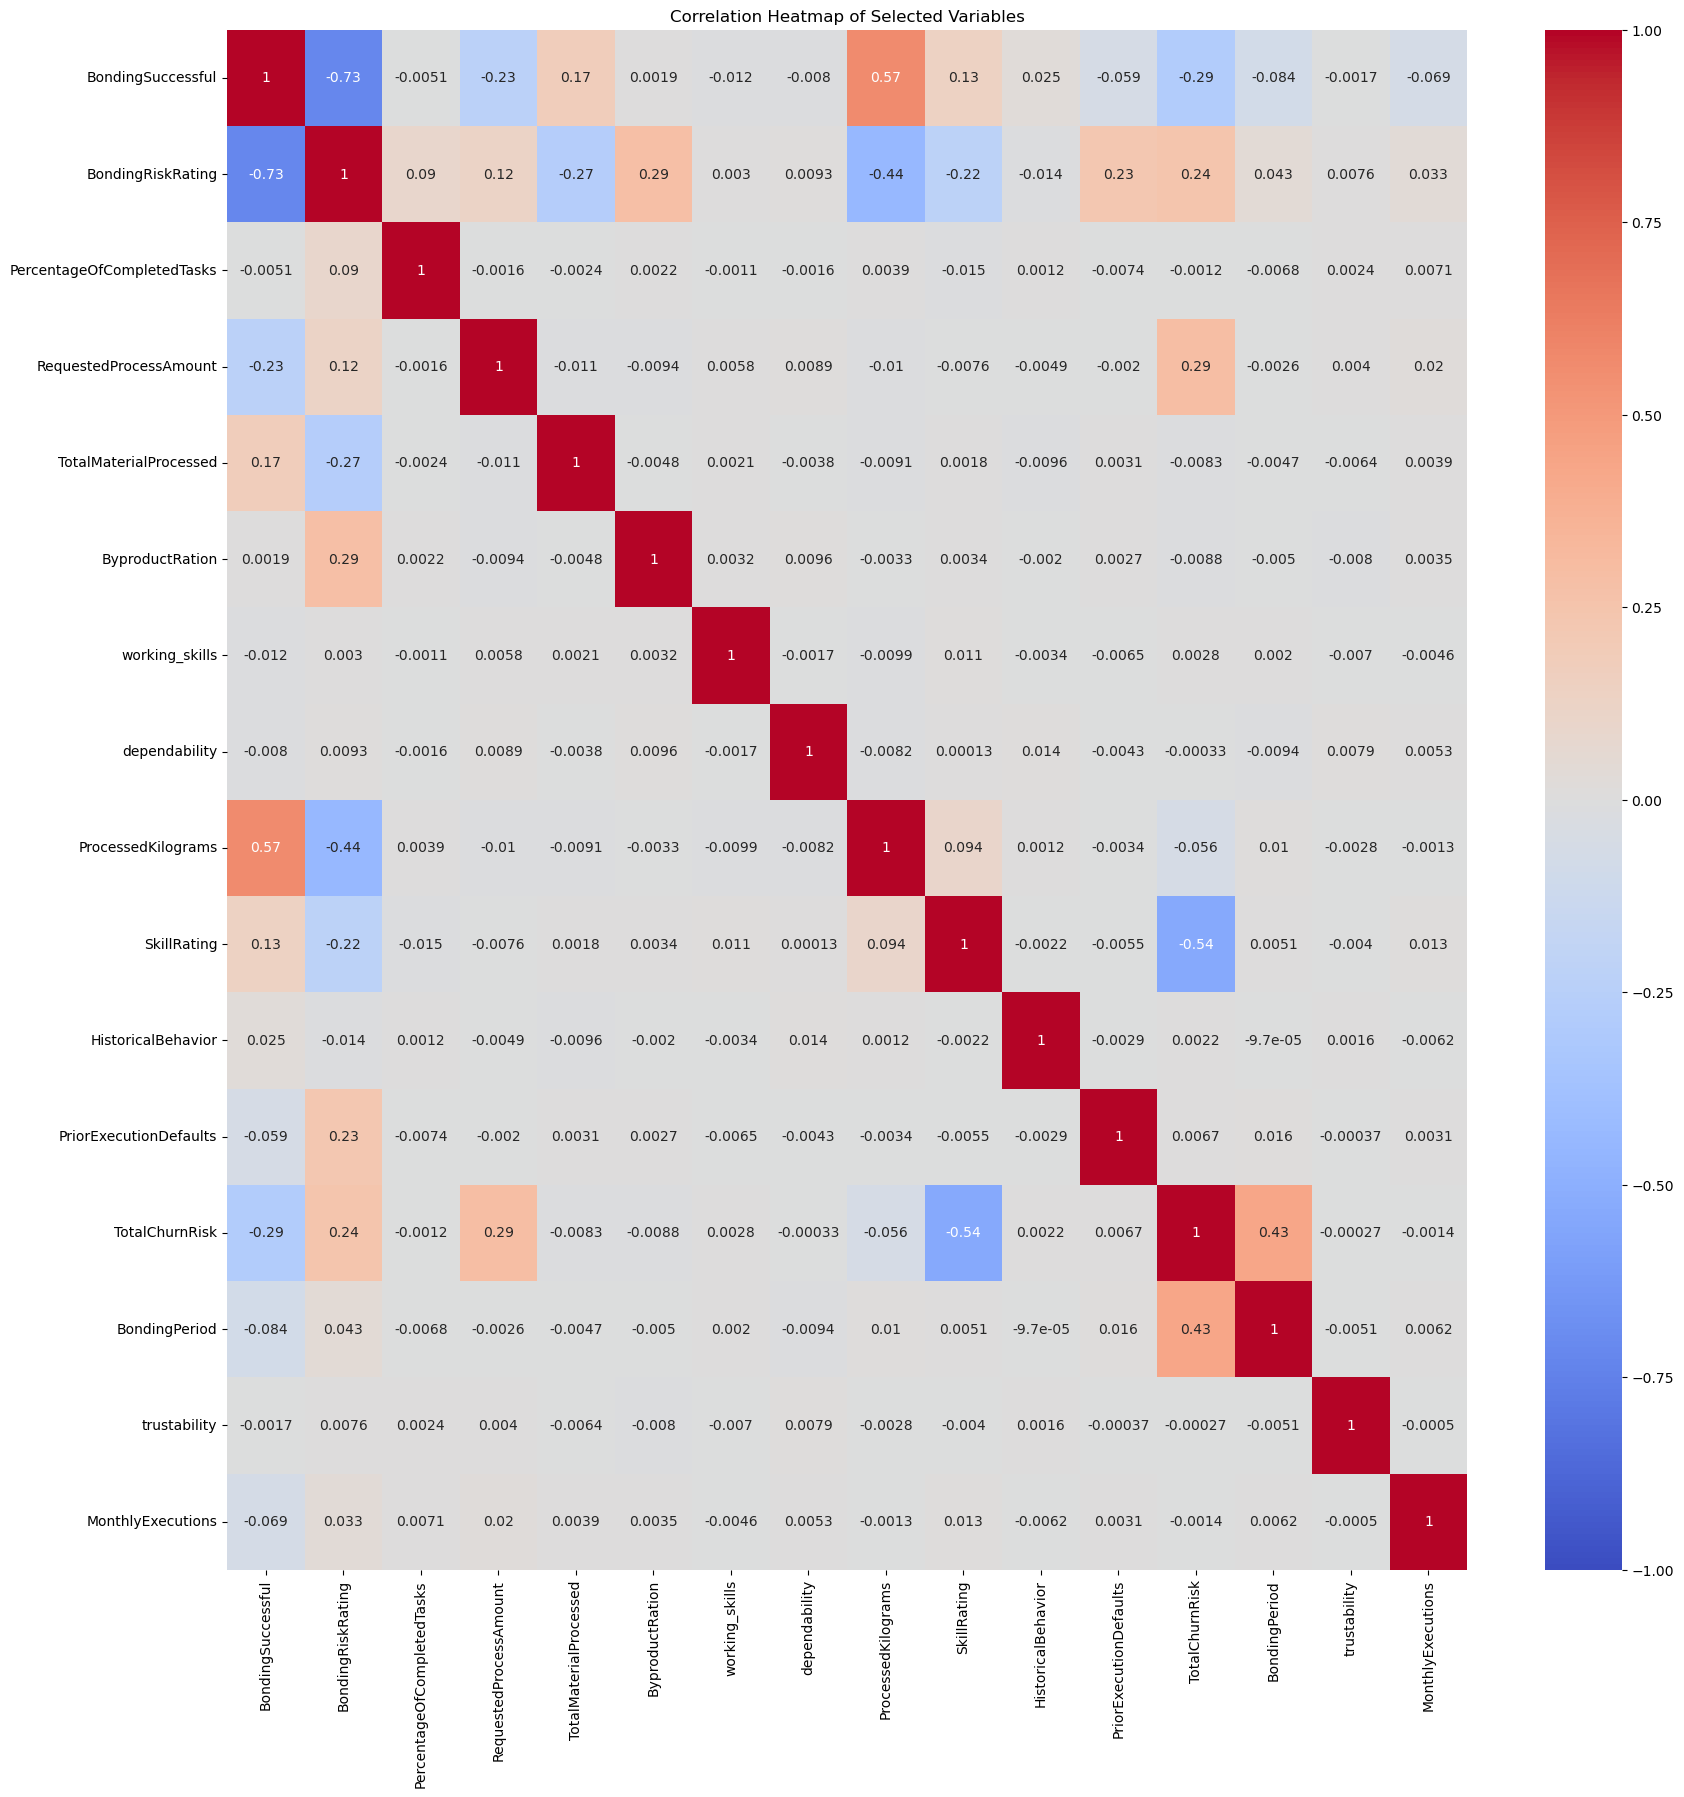

In [17]:
# Selects the relevant columns for the heatmap
columns_for_heatmap = [
    'BondingSuccessful', 'BondingRiskRating', 'PercentageOfCompletedTasks', 
    'RequestedProcessAmount', 'TotalMaterialProcessed', 'ByproductRation', 
    'working_skills', 'dependability', 'ProcessedKilograms', 'SkillRating', 
    'HistoricalBehavior', 'PriorExecutionDefaults', 'TotalChurnRisk', 
    'BondingPeriod', 'trustability', 'MonthlyExecutions'
]

# Filters the DataFrame to include only the selected columns
aerogel_bonding_df_updt = aerogel_bonding_df[columns_for_heatmap]

# Computes the correlation matrix
correlation_matrix = aerogel_bonding_df_updt.corr()

# Plots the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Selected Variables")
plt.show()


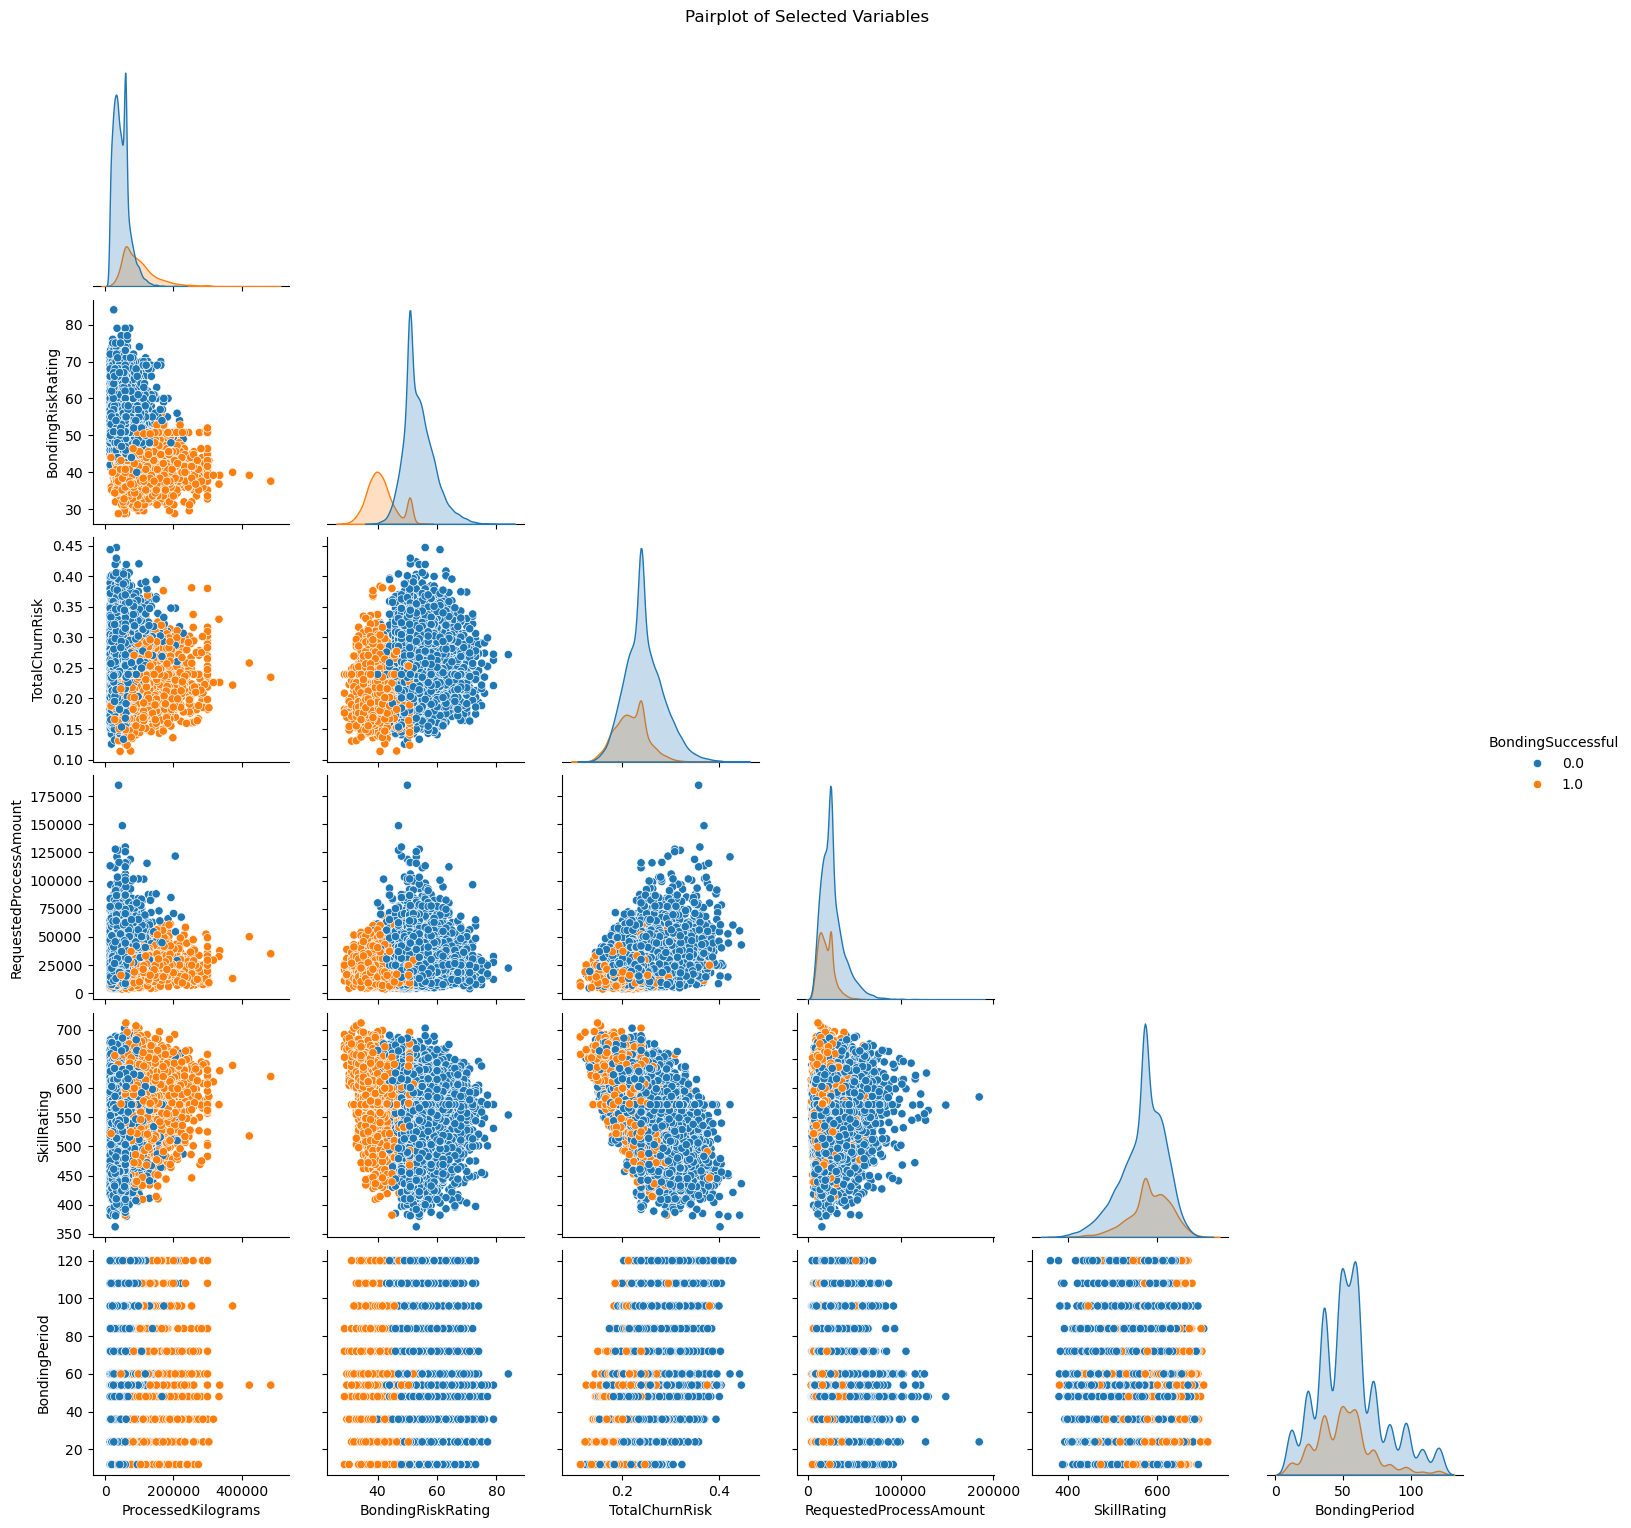

In [18]:
# Selects the relevant columns for the pairplot
columns_for_pairplot = [
    'BondingSuccessful',
    'ProcessedKilograms',
    'BondingRiskRating',
    'TotalChurnRisk',
    'RequestedProcessAmount',
    'SkillRating',
    'BondingPeriod',
]

# Filters the DataFrame to include only the selected columns
df_selected = aerogel_bonding_df[columns_for_pairplot]

# Creates the pairplot
sns.pairplot(df_selected, hue='BondingSuccessful', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Variables", y=1.02)  # Add a title
plt.show()


# Train/Validation/Test Split :

At this step, we select the most relevant features for our prediction task based on the correlation analysis performed earlier. We include the variables that show the strongest linear relationships with the target variable (BondingSuccessful), both positive and negative, because they are the most informative for the model. Irrelevant or weakly correlated features (such as timestamps or identifiers) are excluded to reduce noise and improve model performance.

After selecting the features, we split the dataset into training and testing sets.
We use an 80/20 split because our dataset is large (20,000 samples), which allows us to train effectively while keeping enough unseen data for evaluation.
We also use stratified splitting to ensure that the proportion of successful vs. unsuccessful bonding cases remains consistent in both sets, preventing class imbalance issues during training.

In [19]:
from sklearn.model_selection import train_test_split

# Identifies the target variable
target = 'BondingSuccessful'

# Selects the features (exclude target and irrelevant columns like 'ProcessingTimestamp')
features = [
    'ProcessedKilograms', # high positive correlation coefficient 0.53
    'BondingRiskRating', # high negative correlation coefficient -0.68
    'TotalChurnRisk', # moderate negative correlation coefficient -0.27
    'RequestedProcessAmount', # low negative correlation coefficient of -0.21
    'SkillRating', # low positive correlation coefficient 0.13 we keep this one for comparison purposes
    'BondingPeriod', # very low negative correlation of -0.097
]

# Filters the dataset to include only the selected features and the target
X = aerogel_bonding_df[features]
y = aerogel_bonding_df[target]

# Splits the data into training (80%) and testing (20%) sets, because our dataset is large(20,000 samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Training set size: 14397
Testing set size: 3600
X_train shape: (14397, 6), y_train shape: (14397,)
X_test shape: (3600, 6), y_test shape: (3600,)


Checking the split distribution:

In [20]:
# Calculates the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculates the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculates the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Prints the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")

Distribution of y (Original Dataset):
Class 0.0: 13690 samples
Class 1.0: 4307 samples
Ratio: 0.2393176640551203

Distribution of y_train (Training Set):
Class 0.0: 10952 samples
Class 1.0: 3445 samples
Ratio: 0.23928596235326804

Distribution of y_test (Test Set):
Class 0.0: 2738 samples
Class 1.0: 862 samples
Ratio: 0.23944444444444443


**Scaling**

Before training machine learning models, it is important to ensure that all numerical features are on a similar scale. In our dataset, the selected features (such as ProcessedKilograms, BondingRiskRating, BondingPeriod, etc.) have very different numeric ranges. For example, some features may range from 0 to 1, while others may go up to several thousand. Models like Logistic Regression and Artificial Neural Networks are sensitive to these differences and may give more importance to large-scale features if we do not normalize them.

To address this, we apply MinMax scaling, which transforms every feature into a value between 0 and 1.
We fit the scaler only on the training set (to avoid data leakage), and then apply the same transformation to the test set. This ensures that both sets are scaled consistently while preserving the integrity of the evaluation process.

The output below prints the shapes of the scaled datasets, confirming that the number of rows and columns remains unchanged—only the values have been normalized.

In [21]:
from sklearn.preprocessing import MinMaxScaler 

# Scales the columns using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Outputs
print("Preprocessed Training Set Shape:", X_train_scaled.shape)
print("Preprocessed Testing Set Shape:", X_test_scaled.shape)

Preprocessed Training Set Shape: (14397, 6)
Preprocessed Testing Set Shape: (3600, 6)


# Model Execution and Evaluation: 

Importing the packages needed for Model Execution and Evaluation 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Random Forest**

In this section, we train a Random Forest Classifier, which is an ensemble machine learning model made up of many individual decision trees. Each tree learns patterns independently, and the final prediction is based on majority voting across all trees. Random Forests are powerful because they naturally handle nonlinear relationships, interactions between variables, and they are generally robust to noise.

After training on the training dataset, the model is evaluated on the test dataset.

In [23]:
# Sets the parameters for RF
random_forest = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    class_weight='balanced',
    n_jobs=-1
)

#Trains on train data
random_forest.fit(X_train, y_train)

#Predicts on test data
y_pred_rf = random_forest.predict(X_test)

# Evaluation
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest
Accuracy: 0.975
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2738
         1.0       0.97      0.93      0.95       862

    accuracy                           0.97      3600
   macro avg       0.97      0.96      0.97      3600
weighted avg       0.97      0.97      0.97      3600

Confusion matrix:
 [[2712   26]
 [  64  798]]


**Logistic Regression**

In this section, we train a Logistic Regression model to predict whether the aerogel bonding process is successful (1) or not (0). Logistic Regression is a linear classification algorithm that works well when the relationship between features and the target is approximately linear. It also provides interpretable coefficients that indicate how each feature contributes to the probability of success.

Because Logistic Regression is sensitive to feature scale, we train the model using the scaled training features (X_train_scaled) and evaluate it on the scaled test features (X_test_scaled). This ensures that all variables contribute equally during optimization.

After training on the training dataset, the model is evaluated on the test dataset.

In [24]:
# Sets the parameters for LR
logreg_model = LogisticRegression(
    random_state=50,
    max_iter=200,
    class_weight='balanced'
)

# Trains on SCALED trained data
logreg_model.fit(X_train_scaled, y_train)

# Predicts on SCALED test data
y_pred_lr = logreg_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.9567

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2738
         1.0       0.88      0.94      0.91       862

    accuracy                           0.96      3600
   macro avg       0.93      0.95      0.94      3600
weighted avg       0.96      0.96      0.96      3600

Confusion Matrix:
[[2630  108]
 [  48  814]]


**Artificial Neural Network**

In this section, we build and evaluate an Artificial Neural Network (ANN) using scikit-learn’s MLPClassifier.
Neural networks are powerful nonlinear models capable of learning complex patterns in the data.
Because ANNs are sensitive to feature scale, we use the scaled training and test datasets (X_train_scaled, X_test_scaled).

After training on the training dataset, the model is evaluated on the test dataset.

In [25]:
# Initializes the ANN model with parameters as listed:

ann_model = MLPClassifier(
    hidden_layer_sizes=(100,), # We tested different layer sizes and 100 is one of the fastest and most accurate size.
    activation='relu', # We use ReLU for hidden layers
    max_iter=200, # We can use 200 as iteration number for optimization 
    random_state=50,  # Higher accuracy 
    batch_size=64, # lower batch size significantly improved our speed
    learning_rate_init=0.1, # Lower learning rate proved higher accuracy during our fine tuning.
    early_stopping=True, # For speed 
    validation_fraction=0.1 # Prevents overfitting
)

# Trains on SCALED trained data
ann_model.fit(X_train_scaled, y_train)

# Predicts on SCALED test data
y_pred_ann = ann_model.predict(X_test_scaled)

# Evaluation
print("Artificial Neural Network (MLP)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann):.4f}\n")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))

Artificial Neural Network (MLP)
Accuracy: 0.9658


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2738
         1.0       0.94      0.91      0.93       862

    accuracy                           0.97      3600
   macro avg       0.96      0.95      0.95      3600
weighted avg       0.97      0.97      0.97      3600


Confusion Matrix:
[[2691   47]
 [  76  786]]


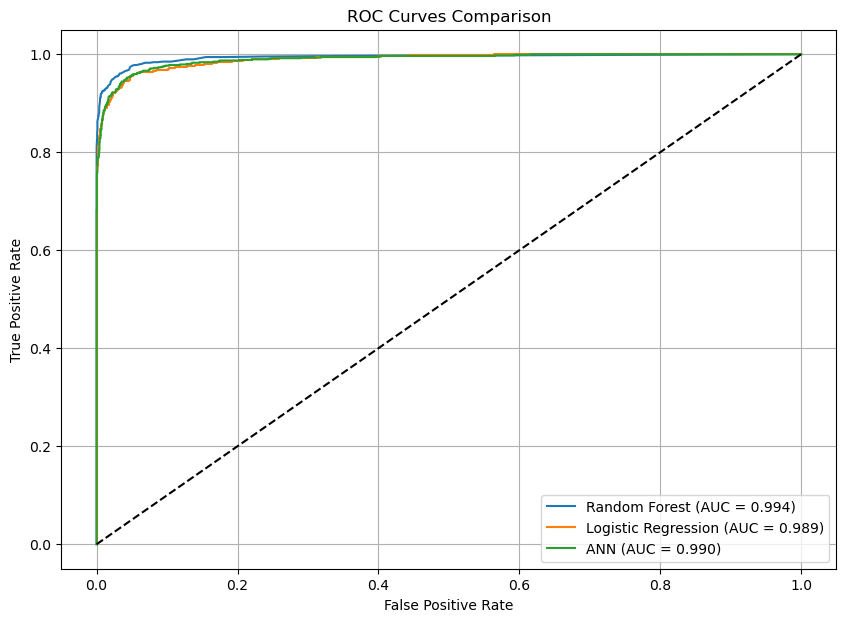

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 7))

# Random Forest 
rf_prob = random_forest.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})")


# Logistic Regression
lr_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]
lr_auc = roc_auc_score(y_test, lr_prob)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.3f})")


# ANN
ann_prob = ann_model.predict_proba(X_test_scaled)[:, 1]
ann_auc = roc_auc_score(y_test, ann_prob)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_prob)
plt.plot(ann_fpr, ann_tpr, label=f"ANN (AUC = {ann_auc:.3f})")


# Baseline Diagonal 
plt.plot([0, 1], [0, 1], "k--")


# Labels 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()



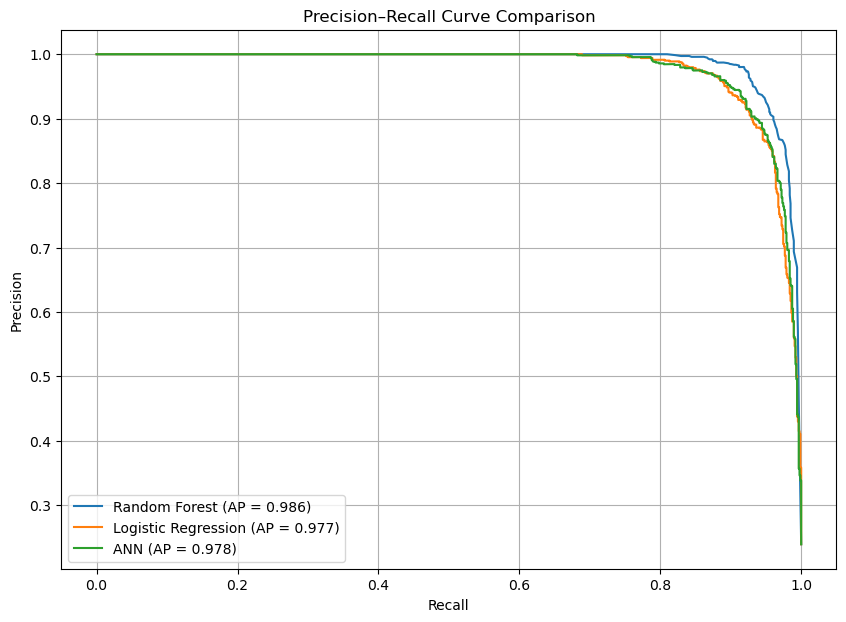

In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score
plt.figure(figsize=(10, 7))

# Random Forest
rf_prob = random_forest.predict_proba(X_test)[:, 1]
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_prob)
rf_ap = average_precision_score(y_test, rf_prob)
plt.plot(rf_recall, rf_precision, label=f"Random Forest (AP = {rf_ap:.3f})")

# Logistic Regression 
lr_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_prob)
lr_ap = average_precision_score(y_test, lr_prob)
plt.plot(lr_recall, lr_precision, label=f"Logistic Regression (AP = {lr_ap:.3f})")

# ANN
ann_prob = ann_model.predict_proba(X_test_scaled)[:, 1]
ann_precision, ann_recall, _ = precision_recall_curve(y_test, ann_prob)
ann_ap = average_precision_score(y_test, ann_prob)
plt.plot(ann_recall, ann_precision, label=f"ANN (AP = {ann_ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()
